# Proyecto final - Grupo 14

---
#**AI, metamorphosis and productivity: connecting the dots**
---



In [187]:
# Importación de librerías para el tratamiento y visualización de los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Cargar el dataset original

df = pd.read_csv('Dataset original _ Dataset for estimation of obesity levels.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [96]:
# Ver información general del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [97]:
# Verificar las columnas del dataset

df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#**Limpieza y análisis del dataset**

---

In [98]:
# Renombrar las columnas del dataset

df.rename(columns={'Gender': 'Género', 'Age': 'Edad', 'Height': 'Estatura', 'Weight': 'Peso', 'family_history_with_overweight': 'Familia',
       'FAVC': 'Hipercal', 'FCVC': 'Vegetales', 'NCP': 'Comidas', 'CAEC': 'Snacks', 'SMOKE': 'Fumar', 'CH2O': 'Agua', 'SCC': 'Monitoreo', 'FAF': 'Deporte', 'TUE': 'Devices',
       'CALC': 'Alcohol', 'MTRANS': 'Transporte', 'NObeyesdad': 'Obesidad'}, inplace=True)

# Verificar los cambios en las columnas
df.columns

Index(['Género', 'Edad', 'Estatura', 'Peso', 'Familia', 'Hipercal',
       'Vegetales', 'Comidas', 'Snacks', 'Fumar', 'Agua', 'Monitoreo',
       'Deporte', 'Devices', 'Alcohol', 'Transporte', 'Obesidad'],
      dtype='object')

In [99]:
# Verificar si hay valores nulos

df.isnull().sum()

Género        0
Edad          0
Estatura      0
Peso          0
Familia       0
Hipercal      0
Vegetales     0
Comidas       0
Snacks        0
Fumar         0
Agua          0
Monitoreo     0
Deporte       0
Devices       0
Alcohol       0
Transporte    0
Obesidad      0
dtype: int64

In [100]:
# Verificar si hay valores duplicados

print(f'Número de filas duplicadas en el dataset es: {df.duplicated().sum()}\n')

# Mirar los valores duplicados
df[df.duplicated()]

Número de filas duplicadas en el dataset es: 24



,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Obesidad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [101]:
# Eliminar las filas duplicadas del dataset

df.drop_duplicates(inplace = True)

# Verificar si se eliminaron las filas duplicadas
print(f'Número de filas duplicadas en el dataset es: {df.duplicated().sum()}\n___________________________\n')

# Ver la información general del dataset
df.info()

Número de filas duplicadas en el dataset es: 0
___________________________

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Género      2087 non-null   object 
 1   Edad        2087 non-null   float64
 2   Estatura    2087 non-null   float64
 3   Peso        2087 non-null   float64
 4   Familia     2087 non-null   object 
 5   Hipercal    2087 non-null   object 
 6   Vegetales   2087 non-null   float64
 7   Comidas     2087 non-null   float64
 8   Snacks      2087 non-null   object 
 9   Fumar       2087 non-null   object 
 10  Agua        2087 non-null   float64
 11  Monitoreo   2087 non-null   object 
 12  Deporte     2087 non-null   float64
 13  Devices     2087 non-null   float64
 14  Alcohol     2087 non-null   object 
 15  Transporte  2087 non-null   object 
 16  Obesidad    2087 non-null   object 
dtypes: float64(8), object(9)
memory usage:

In [102]:
# Añadir una columna con el índice de masa corporal (IMC)

df['IMC'] = df['Peso'] / ((df['Estatura'])**2)
df

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Obesidad,IMC
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


**REVISIÓN DE LA CLASIFICACIÓN DEL DATASET (OPCIONAL)**

In [103]:
# Revisión de la clasificación original de los niveles de obesidad

df2 = df[['Obesidad', 'IMC']]
print(f'    Dataset de prueba df2:\n{df2}')
print('___________________________________')
print(f'\n    Conteo de clases:')
print(df2['Obesidad'].value_counts())
print('___________________________________')
df3 = df2[df2['Obesidad'] == 'Overweight_Level_I']
print(f'\n    Detalles de clase (Overweight_Level_I):\n{df3.describe()}')
print('___________________________________')
print(f'\nValor mínimo de IMC (Overweight_Level_I): {df3["IMC"].min()}')
print(f'\nValor máximo de IMC (Overweight_Level_I): {df3["IMC"].max()}')


    Dataset de prueba df2:
                 Obesidad        IMC
0           Normal_Weight  24.386526
1           Normal_Weight  24.238227
2           Normal_Weight  23.765432
3      Overweight_Level_I  26.851852
4     Overweight_Level_II  28.342381
...                   ...        ...
2106     Obesity_Type_III  44.901475
2107     Obesity_Type_III  43.741923
2108     Obesity_Type_III  43.543817
2109     Obesity_Type_III  44.071535
2110     Obesity_Type_III  44.144338

[2087 rows x 2 columns]
___________________________________

    Conteo de clases:
Obesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64
___________________________________

    Detalles de clase (Overweight_Level_I):
              IMC
count  276.000000
mean    25.956179
std      0.658815
min     22.826739
25%     25.555096
50%     25.951557
75%     26.312

In [104]:
# Crear nueva columna con la clasificación de acuerdo al IMC

# Definir los rangos de IMC y las etiquetas correspondientes
bins = [0, 18.5, 25, 30, 35, 40, float('inf')] # float('inf') garantiza que no haya un límite superior para la última categoría.
labels = ['Bajo peso', 'Peso normal', 'Sobrepeso', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3']

# Usar pd.cut para categorizar el IMC en los niveles definidos
df2['Nivel'] = pd.cut(df2['IMC'], bins=bins, labels=labels, right=False) # right=False [a, b)

df2.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_21440\2018681704.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Nivel'] = pd.cut(df2['IMC'], bins=bins, labels=labels, right=False) # right=False [a, b)


,Obesidad,IMC,Nivel
917,Overweight_Level_I,26.583025,Sobrepeso
2005,Obesity_Type_III,41.497955,Obesidad 3
1605,Obesity_Type_II,35.304433,Obesidad 2
575,Insufficient_Weight,16.443022,Bajo peso
279,Insufficient_Weight,16.229206,Bajo peso
395,Insufficient_Weight,16.444594,Bajo peso
579,Insufficient_Weight,17.390428,Bajo peso
81,Overweight_Level_II,28.086420,Sobrepeso
399,Normal_Weight,22.038567,Peso normal
1572,Obesity_Type_II,36.534764,Obesidad 2


In [105]:
df2[(df2['Obesidad'] == 'Overweight_Level_I') & (df2['IMC'] < 25)]

,Obesidad,IMC,Nivel
782,Overweight_Level_I,24.536301,Peso normal
784,Overweight_Level_I,22.826739,Peso normal
786,Overweight_Level_I,24.702015,Peso normal
789,Overweight_Level_I,24.924494,Peso normal
813,Overweight_Level_I,24.188678,Peso normal
866,Overweight_Level_I,24.659073,Peso normal
875,Overweight_Level_I,24.950732,Peso normal
892,Overweight_Level_I,24.281657,Peso normal
905,Overweight_Level_I,24.917785,Peso normal
951,Overweight_Level_I,24.171508,Peso normal


**ANÁLISIS GRÁFICO DE LOS DATOS**

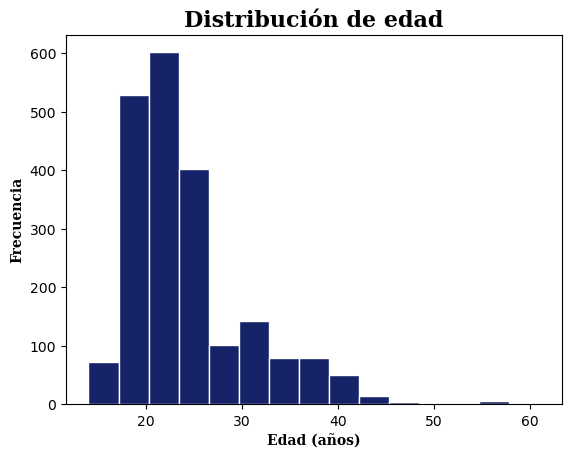

In [106]:
# Ajustes de gráfico
plt.hist(df['Edad'], bins=15, edgecolor='white', color = "#172369") # bins: rangos (barras)


# Ajuste de labels
plt.title('Distribución de edad', fontsize = 16, fontweight='bold', fontfamily='serif')
plt.xlabel('Edad (años)', fontweight='bold', fontfamily='serif')
plt.ylabel('Frecuencia', fontweight='bold', fontfamily='serif')
plt.show()

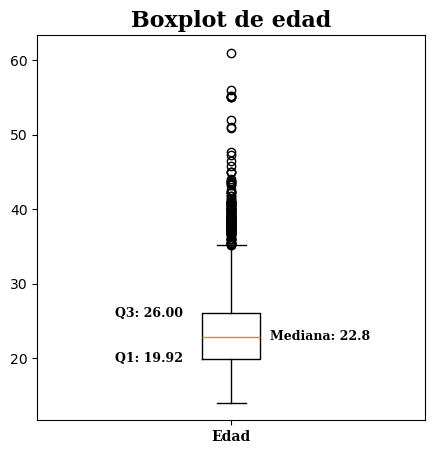

In [107]:
# Ajuste de datos para boxplot
plt.figure(figsize=(5, 5))
plt.boxplot(df['Edad'])

# Ajuste de labels
plt.title('Boxplot de edad', fontsize = 16, fontweight='bold', fontfamily='serif')
plt.xticks([1], ['Edad'], fontweight='bold', fontfamily='serif')

# Anotaciones dentro del gráfico
plt.annotate(f'Mediana: {round(df.Edad.median(), 1)}', xy=(1.1, 22.5), fontsize = 9, fontweight='bold', fontfamily='serif') # xy=() es la ubicación de la nota
plt.annotate(f'Q3: {df.Edad.quantile(0.75):.2f}', xy=(0.7, 25.5), fontsize = 9, fontweight='bold', fontfamily='serif') # xy=() es la ubicación de la nota
plt.annotate(f'Q1: {df.Edad.quantile(0.25):.2f}', xy=(0.7, 19.5), fontsize = 9, fontweight='bold', fontfamily='serif') # xy=() es la ubicación de la nota
plt.show()

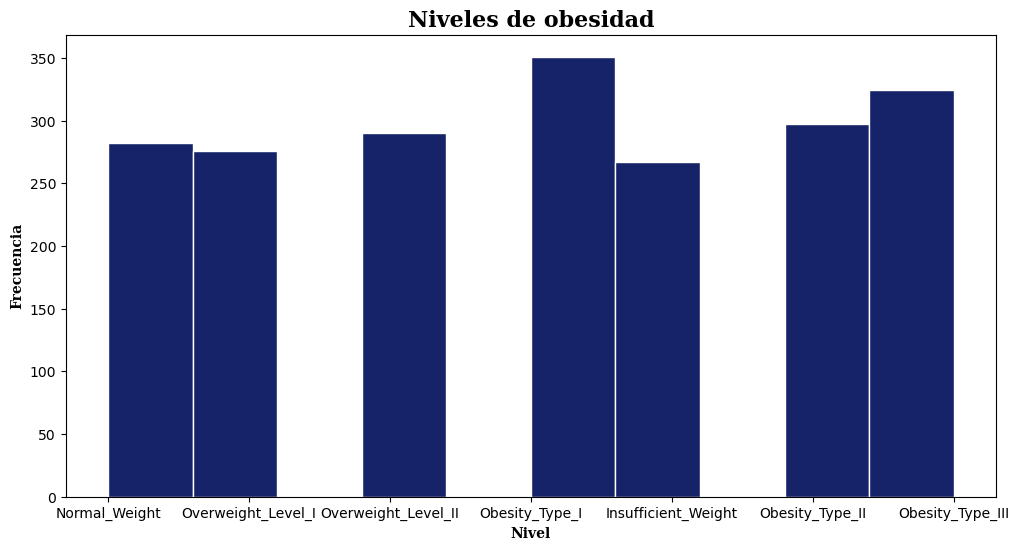

In [108]:
# Ajustes de gráfico
plt.figure(figsize=(12,6))
plt.hist(df['Obesidad'], bins=10, edgecolor='white', color = "#172369") # bins: rangos (barras)

# Ajuste de labels
plt.title('Niveles de obesidad', fontsize = 16, fontweight='bold', fontfamily='serif')
plt.xlabel('Nivel', fontweight='bold', fontfamily='serif')
plt.ylabel('Frecuencia', fontweight='bold', fontfamily='serif')
plt.show()

**CONVERSIÓN DE DATOS CATEGÓRICOS A NUMÉRICOS**

In [109]:
# Verificación de variables categóricas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Género      2087 non-null   object 
 1   Edad        2087 non-null   float64
 2   Estatura    2087 non-null   float64
 3   Peso        2087 non-null   float64
 4   Familia     2087 non-null   object 
 5   Hipercal    2087 non-null   object 
 6   Vegetales   2087 non-null   float64
 7   Comidas     2087 non-null   float64
 8   Snacks      2087 non-null   object 
 9   Fumar       2087 non-null   object 
 10  Agua        2087 non-null   float64
 11  Monitoreo   2087 non-null   object 
 12  Deporte     2087 non-null   float64
 13  Devices     2087 non-null   float64
 14  Alcohol     2087 non-null   object 
 15  Transporte  2087 non-null   object 
 16  Obesidad    2087 non-null   object 
 17  IMC         2087 non-null   float64
dtypes: float64(9), object(9)
memory usage: 309.8+ KB


In [110]:
# Conversión de variables categóricas a numéricas

df['Género'] = df['Género'].map({'Female': 0, 'Male': 1})

df['Familia'] = df['Familia'].map({'no': 0, 'yes': 1})

df['Hipercal'] = df['Hipercal'].map({'no': 0, 'yes': 1})

df['Snacks'] = df['Snacks'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

df['Fumar'] = df['Fumar'].map({'no': 0, 'yes': 1})

df['Monitoreo'] = df['Monitoreo'].map({'no': 0, 'yes': 1})

df['Alcohol'] = df['Alcohol'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

df['Transporte'] = df['Transporte'].map({'Walking': 0, 'Bike': 1, 'Public_Transportation': 2, 'Motorbike': 3, 'Automobile': 4})

df['Obesidad'] = df['Obesidad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})

# Verificación de los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Género      2087 non-null   int64  
 1   Edad        2087 non-null   float64
 2   Estatura    2087 non-null   float64
 3   Peso        2087 non-null   float64
 4   Familia     2087 non-null   int64  
 5   Hipercal    2087 non-null   int64  
 6   Vegetales   2087 non-null   float64
 7   Comidas     2087 non-null   float64
 8   Snacks      2087 non-null   int64  
 9   Fumar       2087 non-null   int64  
 10  Agua        2087 non-null   float64
 11  Monitoreo   2087 non-null   int64  
 12  Deporte     2087 non-null   float64
 13  Devices     2087 non-null   float64
 14  Alcohol     2087 non-null   int64  
 15  Transporte  2087 non-null   int64  
 16  Obesidad    2087 non-null   int64  
 17  IMC         2087 non-null   float64
dtypes: float64(9), int64(9)
memory usage: 309.8 KB


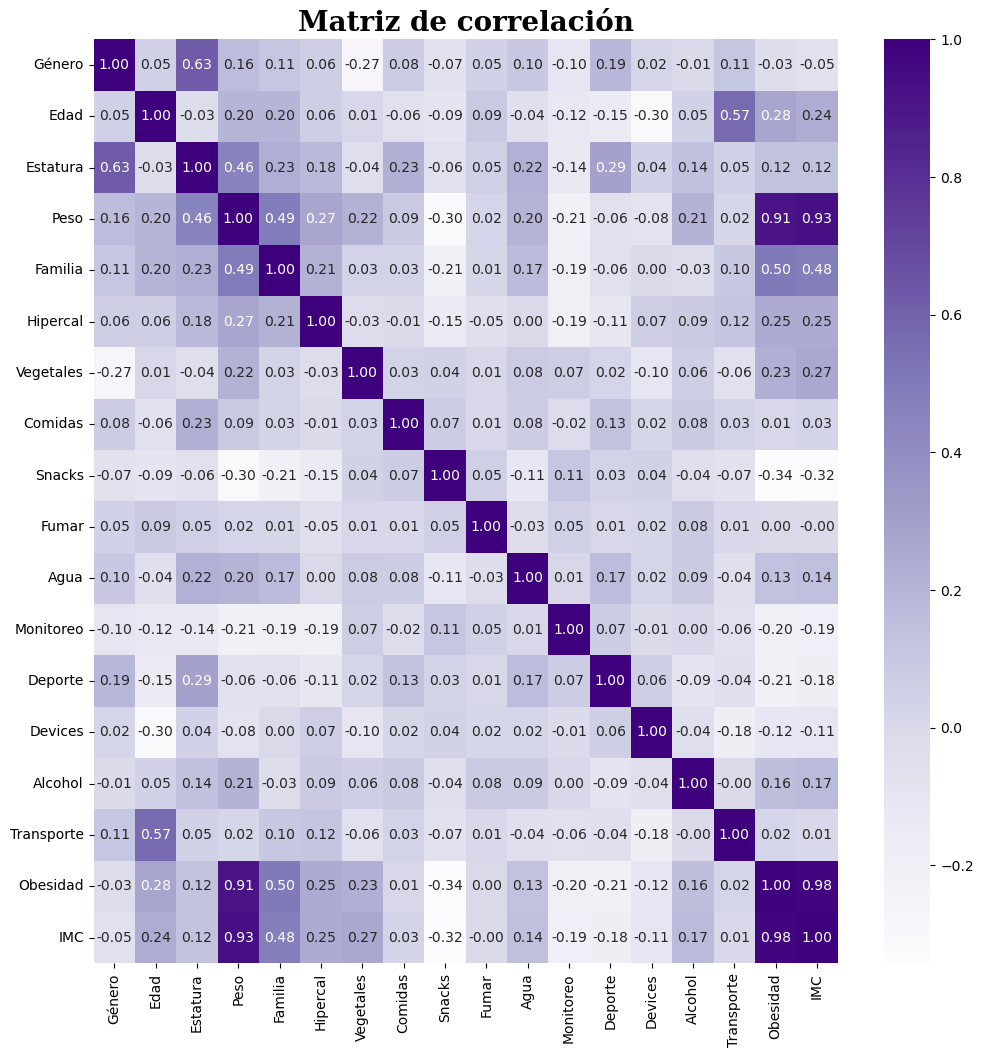

In [111]:
# Matriz de correlación

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='Purples', fmt='.2f')
plt.title('Matriz de correlación', fontsize = 20, fontweight='bold', fontfamily='serif')

plt.show()

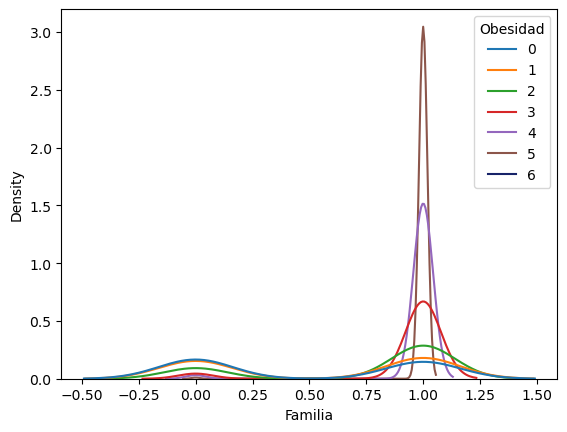

In [112]:
sns.kdeplot(data=df, x='Familia', warn_singular=False, hue='Obesidad', palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#172369"])

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21440\943623110.py:1: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.kdeplot(data=df, x='IMC', hue='Snacks', color='Blues', palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#172369"])


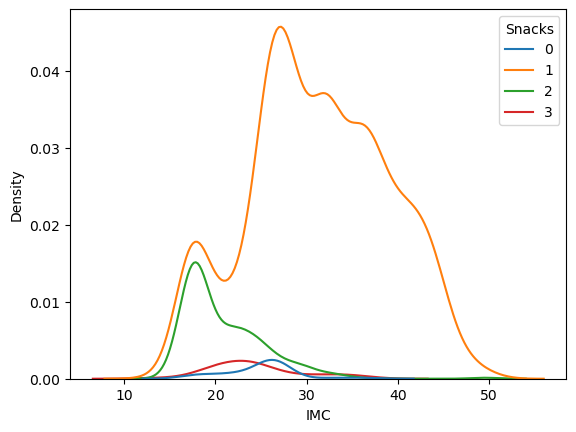

In [113]:
sns.kdeplot(data=df, x='IMC', hue='Snacks', color='Blues', palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#172369"])

plt.show()

In [114]:
df = df.drop(columns=['IMC'])
df

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Obesidad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,2,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,2,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,2,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,2
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,2,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,2,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,2,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,2,6


In [115]:
#pd.DataFrame.to_csv(df, 'df_numérico.csv', index=False)

#**Modelos de machine learning**

---

# **PCA**

In [116]:
# Importar librerías - Modelo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [117]:
# Verificar el dataset

df.sample(5)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Obesidad
1222,0,23.000000,1.644161,84.340406,1,1,2.177243,3.000000,1,0,2.715572,0,2.230109,0.070897,0,2,4
95,1,26.000000,1.700000,70.000000,1,0,3.000000,1.000000,2,0,2.000000,0,2.000000,0.000000,2,2,1
724,0,18.656912,1.574017,41.220175,0,1,1.649974,1.513835,1,0,1.549974,0,0.227802,1.972926,1,2,0
332,1,27.000000,1.850000,75.000000,1,1,2.000000,1.000000,1,0,2.000000,0,1.000000,0.000000,0,0,1
805,1,21.033794,1.625891,70.000000,0,1,2.000000,1.000000,0,0,2.008760,0,0.631190,0.000000,1,2,2


In [118]:
# z-score media = 0 std = 1 - z = x-mean/std

escala = StandardScaler(with_mean=True, with_std=True)

# Estandarizar los datos
datos_estandar = escala.fit_transform(df)
#datos_estandar # El resultado es un array !!!

In [119]:
# Configuración del modelo PCA

# Crear la instancia de PCA
pca = PCA(n_components=10)  # Reducir a 10 dimensiones

datos_pca = pca.fit_transform(datos_estandar)
#datos_pca

In [120]:
# Varianza explicada

var_explicada = pca.explained_variance_ratio_
#var_explicada

# Ver la suma de la varianza explicada

print(f'Varianza explicada: {var_explicada.sum():.2f}')

Varianza explicada: 0.81


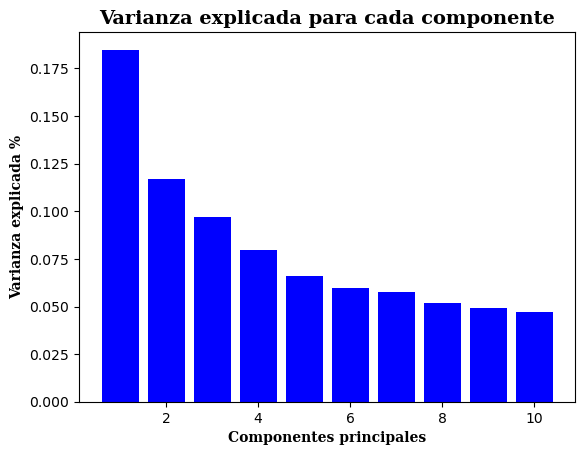

In [121]:
# Gráfica de varianza explicada

# Ajuste de gráfica
plt.bar(range(1, pca.n_components_ + 1), var_explicada, color='blue')

# Labels
plt.title('Varianza explicada para cada componente', fontsize = 14, fontweight='bold', fontfamily='serif')
plt.xlabel('Componentes principales', fontsize = 10, fontweight='bold', fontfamily='serif')
plt.ylabel('Varianza explicada %', fontsize = 10, fontweight='bold', fontfamily='serif')
plt.show()

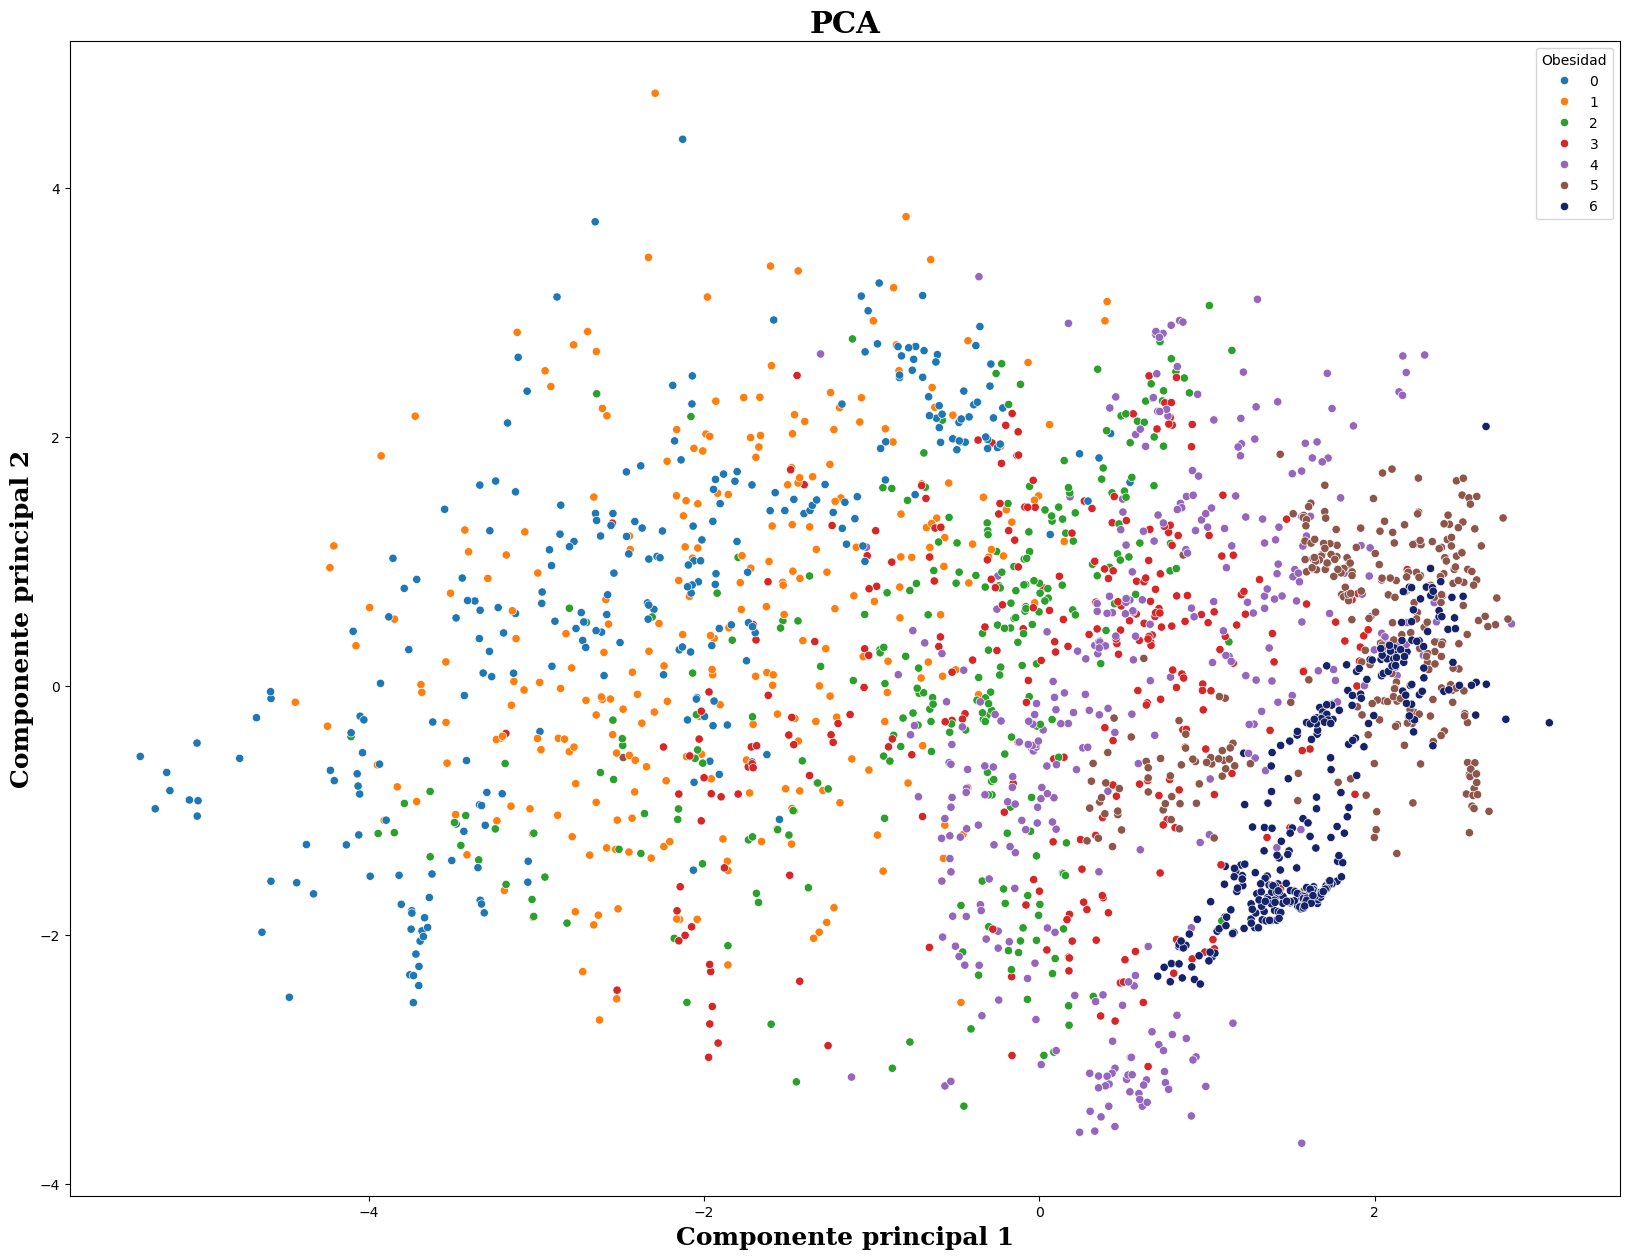

In [122]:
# Gráfica de componentes principales (Distinción de clases de obesidad)


#Ajuste de gráficos
plt.figure(figsize=(20, 15))
sns.scatterplot(x = datos_pca[:, 0], y = datos_pca[:, 1], hue=df['Obesidad'], palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#172369"])


# Labels
plt.title('PCA', fontsize = 22, fontweight='bold', fontfamily='serif')
plt.xlabel('Componente principal 1', fontsize = 18, fontweight='bold', fontfamily='serif')
plt.ylabel('Componente principal 2', fontsize = 18, fontweight='bold', fontfamily='serif')
plt.show()

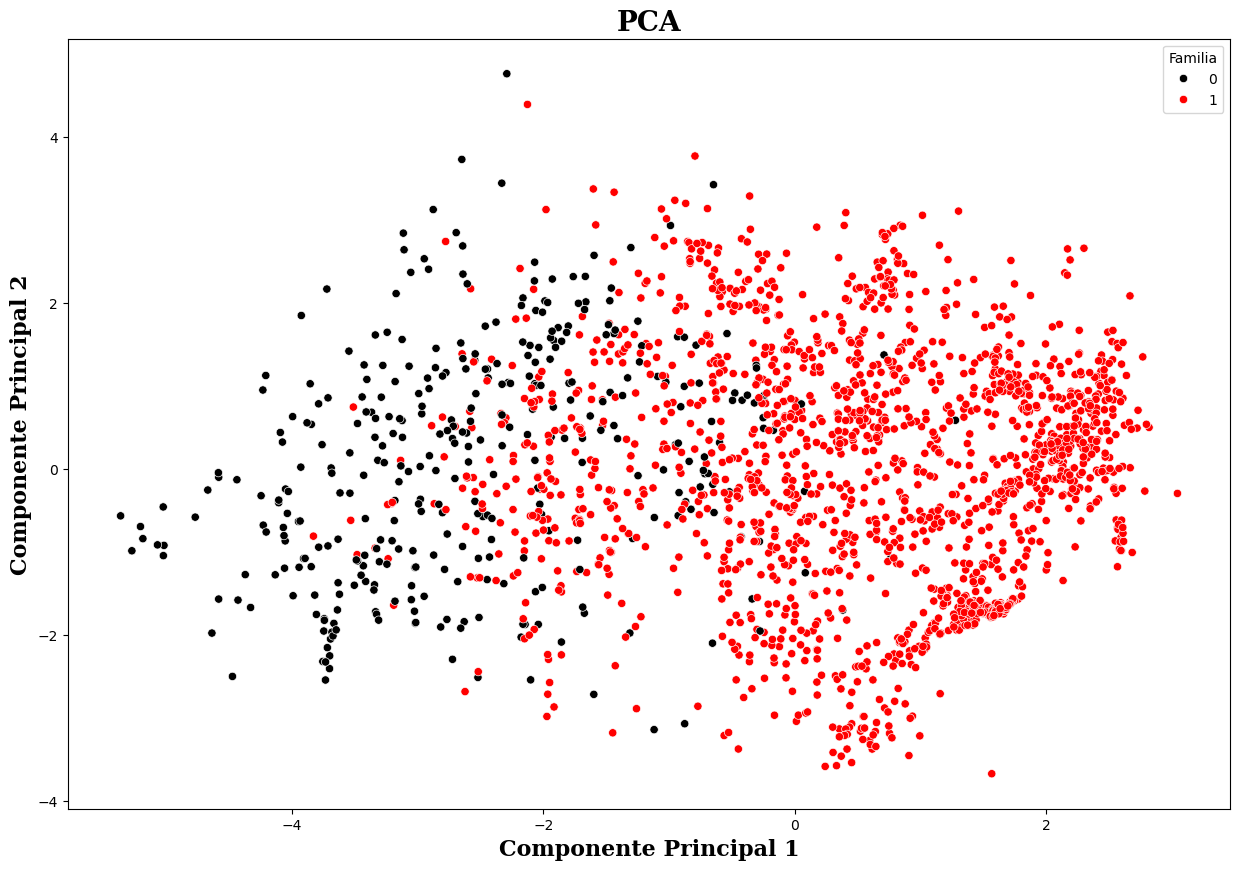

In [123]:
# Gráfica de componentes principales (Distinción de familia)

#Ajuste de gráficos
plt.figure(figsize=(15,10))
sns.scatterplot(x = datos_pca[:, 0], y = datos_pca[:, 1], hue=df['Familia'], palette = ["black", "red"])


# Labels
plt.title('PCA', fontsize = 20, fontweight='bold', fontfamily='serif')
plt.xlabel('Componente Principal 1', fontsize = 16, fontweight='bold', fontfamily='serif')
plt.ylabel('Componente Principal 2', fontsize = 16, fontweight='bold', fontfamily='serif')
plt.show()

#**PCA - Reclasificación**

In [124]:
df['IMC'] = df['Peso'] / (df['Estatura']**2)
df.sample(3)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Obesidad,IMC
1208,0,45.821267,1.687326,80.413997,1,1,2.076689,3.0,1,0,1.026729,0,0.647798,0.0,0,4,3,28.244484
1519,1,26.945139,1.773259,118.154345,1,0,2.183540,3.0,1,0,2.277937,0,0.681830,0.0,1,4,5,37.575550
498,0,25.196214,1.686306,104.572712,1,1,3.000000,3.0,1,0,1.152736,0,0.319156,1.0,1,2,6,36.774400


In [125]:
df2 = df.drop(columns=['Obesidad'])
df2.sample(3)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,IMC
1779,1,24.825393,1.603501,101.038263,1,1,2.996186,1.134042,1,0,1.270166,0,0.073065,1.551934,0,2,39.295915
1274,0,18.000000,1.609321,84.493156,1,1,2.000000,3.000000,1,0,1.051735,0,1.000000,0.000000,0,2,32.623922
861,0,21.832995,1.580964,65.363941,0,1,2.021446,3.000000,1,0,1.077917,0,0.523847,0.808599,1,2,26.151359


**BMI	Nutritional status**

Below 18.5 | Underweight

18.5–24.9  | Normal weight

25.0–29.9  | Pre-obesity

30.0–34.9  | Obesity class I

35.0–39.9  | Obesity class II

Above 40   | Obesity class III

In [126]:
# Crear nueva columna con la clasificación de acuerdo al IMC

# Definir los rangos de IMC y las etiquetas correspondientes

bins = [0, 25, 30, float('inf')] # float('inf') garantiza que no haya un límite superior para la última categoría.
etiquetas = pd.Series(['Normal', 'Sobrepeso', 'Obesidad'])

# Usar pd.cut para categorizar el IMC en los niveles definidos
df2['Nivel'] = pd.cut(df2['IMC'], bins = bins, labels = etiquetas, right = False) # right=False [a, b)

df2.sample(5)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,IMC,Nivel
730,1,17.925497,1.829142,59.933015,1,1,2.860990,4.000000,1,0,2.000000,0,2.000000,0.007872,0,4,17.913122,Normal
1239,0,23.000000,1.610820,82.532994,1,1,2.096630,2.879541,1,0,2.432967,0,1.887012,0.000000,0,2,31.807796,Obesidad
1902,0,25.498965,1.683950,104.846817,1,1,3.000000,3.000000,1,0,1.241378,0,0.259427,0.852362,1,2,36.974037,Obesidad
765,0,30.958957,1.633491,68.803694,1,1,2.052152,3.000000,1,0,1.972074,0,0.228307,0.000000,1,4,25.785661,Sobrepeso
1797,1,25.512048,1.660761,104.321463,1,1,2.748971,1.213431,1,0,1.448875,0,0.128548,1.239038,0,2,37.823298,Obesidad


In [127]:
# Transformación de variable categórica a numérica

df2['Nivel'] = df2['Nivel'].map({'Normal': 0, 'Sobrepeso': 1, 'Obesidad': 2,})
df2.sample(5)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,IMC,Nivel
233,0,34.000000,1.680000,77.000000,1,0,3.000000,1.0,1,0,2.000000,0,1.000000,0.000000,1,4,27.281746,1
393,1,18.000000,1.700000,78.000000,0,1,1.000000,3.0,1,0,2.000000,0,0.000000,1.000000,1,2,26.989619,1
1129,1,21.123048,1.717037,80.000000,1,1,2.000000,3.0,1,0,2.000000,0,2.270555,1.343044,0,2,27.135053,1
2089,0,26.000000,1.633887,111.878132,1,1,3.000000,3.0,1,0,2.621976,0,0.000000,0.123861,1,2,41.908409,2
836,0,31.255587,1.693080,71.927379,1,1,2.615788,3.0,1,0,1.771781,0,0.759422,0.686529,1,4,25.092231,1


In [128]:
df2 = df2.drop(columns=['IMC'])
df2.sample(3)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Nivel
989,0,20.392665,1.525234,65.220249,1,0,2.451009,3.0,1,0,2.000000,0,2.177243,1.323877,0,2,1
1576,1,26.957645,1.780731,112.957922,1,1,2.263245,3.0,1,0,2.092509,0,0.000000,1.836853,1,4,2
1667,1,28.404332,1.787379,112.173731,1,1,1.878251,3.0,1,0,2.022933,0,0.000000,0.325445,1,4,2


In [129]:
# z-score media = 0 std = 1 - z = x-mean/std

escala = StandardScaler(with_mean=True, with_std=True)

# Estandarizar los datos

datos_estandar = escala.fit_transform(df2)
#datos_estandar # El resultado es un array !!!

In [130]:
# Configuración del modelo PCA

# Crear la instancia de PCA
pca = PCA(n_components=10)  # Reducir a 10 dimensiones

datos_pca = pca.fit_transform(datos_estandar)
#datos_pca

In [131]:
# Varianza explicada

var_explicada = pca.explained_variance_ratio_
#var_explicada

# Ver la suma de la varianza explicada

print(f'Varianza explicada: {var_explicada.sum():.2f}')

Varianza explicada: 0.81


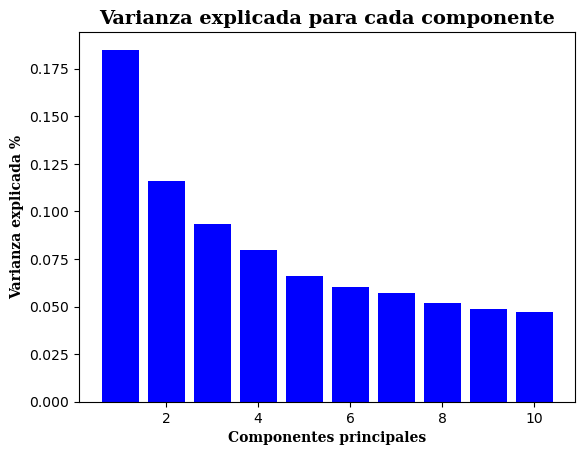

In [132]:
# Gráfica de varianza explicada

# Ajuste de gráfica
plt.bar(range(1, pca.n_components_ + 1), var_explicada, color='blue')

# Labels
plt.title('Varianza explicada para cada componente', fontsize = 14, fontweight='bold', fontfamily='serif')
plt.xlabel('Componentes principales', fontsize = 10, fontweight='bold', fontfamily='serif')
plt.ylabel('Varianza explicada %', fontsize = 10, fontweight='bold', fontfamily='serif')
plt.show()

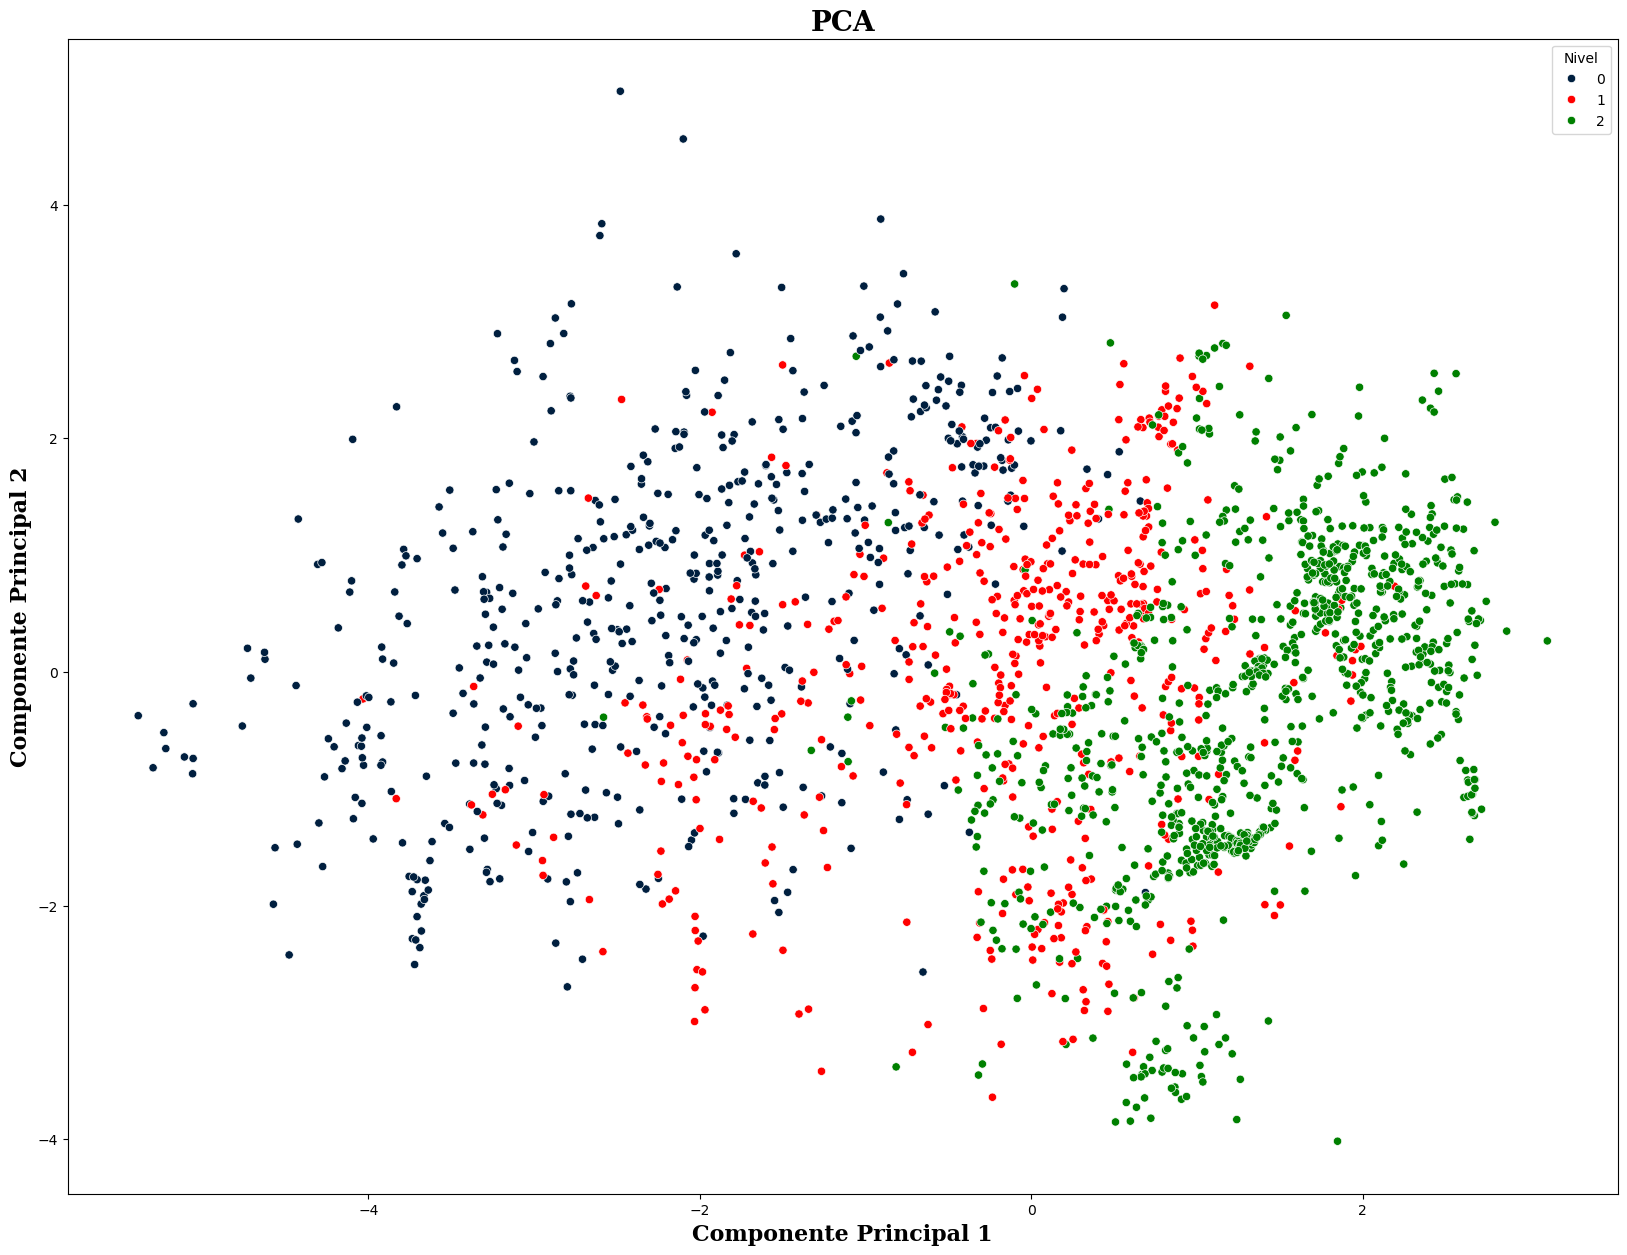

In [133]:
# Gráfica de las componentes principales

#Ajuste de gráficos
plt.figure(figsize=(20,15))
sns.scatterplot(x = datos_pca[:, 0], y = datos_pca[:, 1], hue=df2['Nivel'], palette = ["#001f3f", "r", "green"])

# Labels
plt.title('PCA', fontsize = 20, fontweight='bold', fontfamily='serif')
plt.xlabel('Componente Principal 1', fontsize = 16, fontweight='bold', fontfamily='serif')
plt.ylabel('Componente Principal 2', fontsize = 16, fontweight='bold', fontfamily='serif')
plt.show()

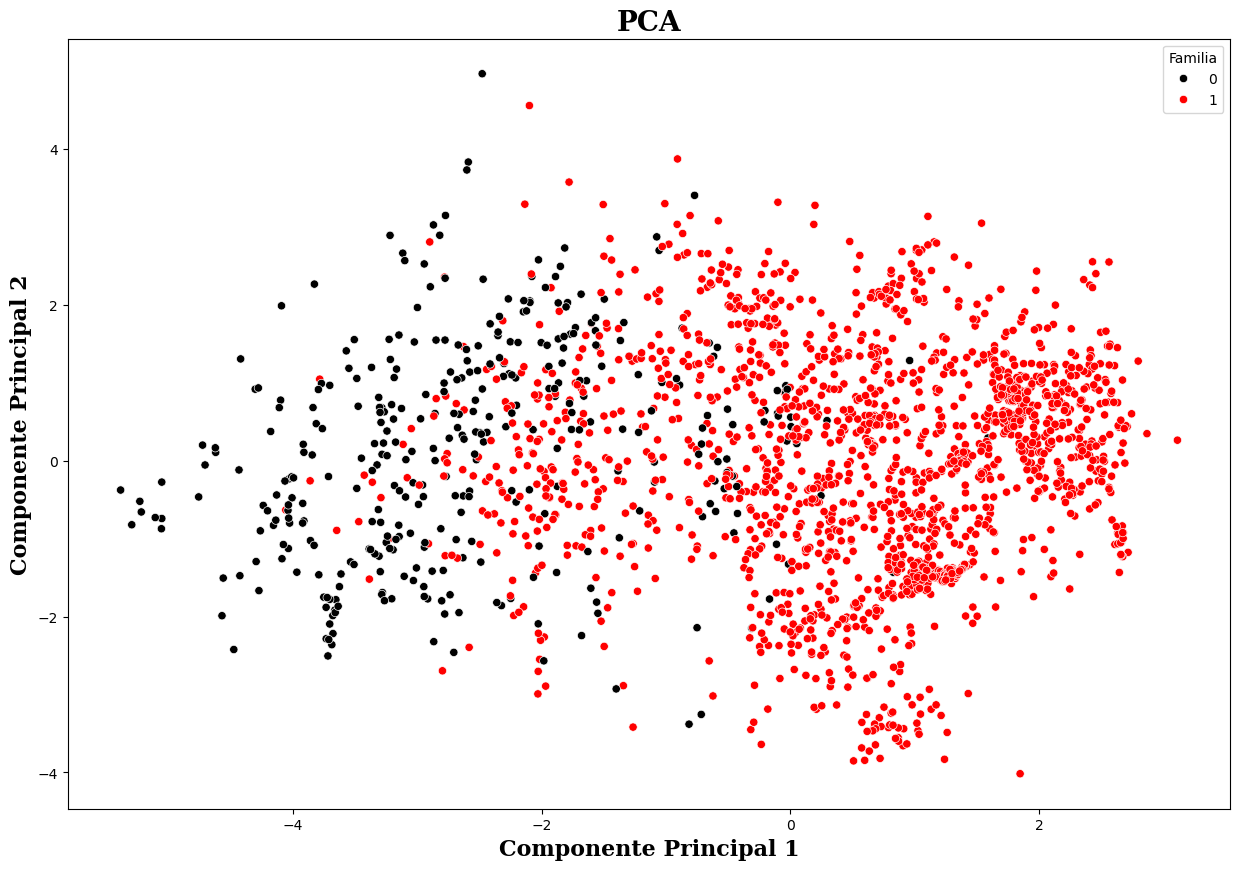

In [134]:
# Gráfica de las componentes principales

#Ajuste de gráficos
plt.figure(figsize=(15,10))
sns.scatterplot(x = datos_pca[:, 0], y = datos_pca[:, 1], hue=df2['Familia'], palette = ["black", "red"])

# Labels
plt.title('PCA', fontsize = 20, fontweight='bold', fontfamily='serif')
plt.xlabel('Componente Principal 1', fontsize = 16, fontweight='bold', fontfamily='serif')
plt.ylabel('Componente Principal 2', fontsize = 16, fontweight='bold', fontfamily='serif')
plt.show()

#**Regresión logística**

In [135]:
# Módulo para la creación de modelos de regresión logistica
from sklearn.linear_model import LogisticRegression

# Módulo para la división de los datos
from sklearn.model_selection import train_test_split

# Módulo para metricas de evaluación del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Módulo para metricas de evaluación del modelo
from sklearn.metrics import classification_report

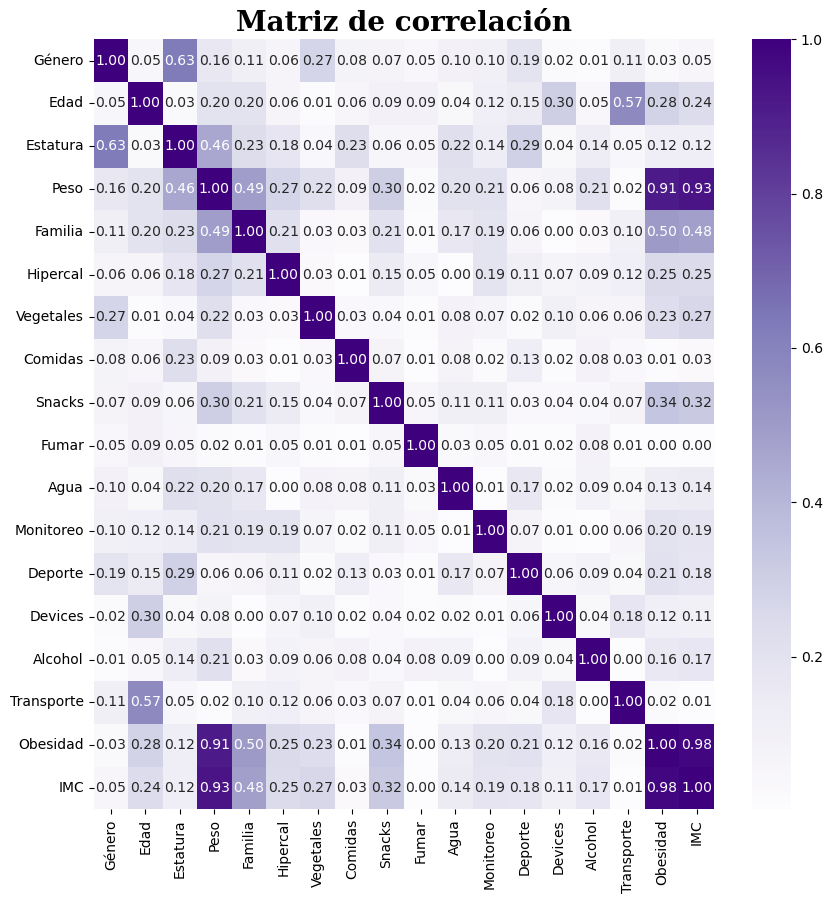

In [136]:
# Matrix de correlación (absoluta) para identificar variables con mayor correlación

plt.figure(figsize=(10, 10))
sns.heatmap(abs(df.corr()), annot=True, cmap='Purples', fmt='.2f')
plt.title('Matriz de correlación', fontsize = 20, fontweight='bold', fontfamily='serif')

plt.show()

In [137]:
# Asignacion de variables

x = df[['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal']] # Variables independientes

y = df['Obesidad'] # Clase

In [138]:
# Dividir los datos en datos de entrenamiento y datos de prueba

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [139]:
# Definir y aplicar el modelo de regresión logística

LR = LogisticRegression()
LR.fit(X_train, y_train)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
# Realizar la predicción

y_pred = LR.predict(X_test)

In [141]:
# Métricas de evaluación

metricasLR = classification_report(y_test, y_pred, target_names=['Bajo peso', 'Peso normal', 'Sobrepeso 1', 'Sobrepeso 2', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3'], digits=3)
print(f'Regresión logística\n______________________________________________________\n\n{metricasLR}')

Regresión logística
______________________________________________________

              precision    recall  f1-score   support

   Bajo peso      0.662     0.586     0.622        87
 Peso normal      0.531     0.358     0.428        95
 Sobrepeso 1      0.373     0.388     0.380        80
 Sobrepeso 2      0.460     0.311     0.371        74
  Obesidad 1      0.328     0.390     0.357       105
  Obesidad 2      0.463     0.589     0.519        95
  Obesidad 3      0.346     0.407     0.374        91

    accuracy                          0.435       627
   macro avg      0.452     0.433     0.436       627
weighted avg      0.450     0.435     0.436       627



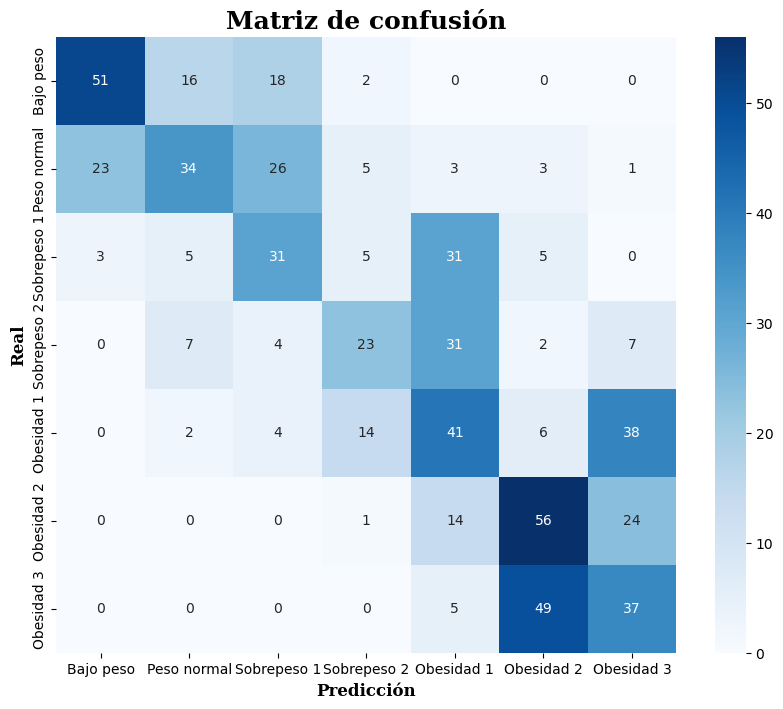

In [142]:
# Matriz de confusión

matrizLR = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con seaborn

plt.figure(figsize=(10, 8))
sns.heatmap(matrizLR, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo peso', 'Peso normal', 'Sobrepeso 1', 'Sobrepeso 2', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3'],
            yticklabels=['Bajo peso', 'Peso normal', 'Sobrepeso 1', 'Sobrepeso 2', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3'])

plt.title('Matriz de confusión', fontsize = 18, fontweight='bold', fontfamily='serif')
plt.xlabel('Predicción', fontsize = 12, fontweight='bold', fontfamily='serif')
plt.ylabel('Real', fontsize = 12, fontweight='bold', fontfamily='serif')

plt.show()

#**Regresión logística - Reclasificación**

In [143]:
df2.sample(5)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Nivel
1198,1,18.000000,1.750097,86.372141,1,1,2.907062,3.0,1,0,2.740848,0,1.219827,0.037634,1,2,1
2086,0,25.951979,1.661712,112.098616,1,1,3.000000,3.0,1,0,2.961899,0,0.259424,0.080128,1,2,2
1114,1,33.009285,1.741192,84.773349,1,1,2.000000,3.0,1,0,2.035954,0,1.210736,0.000000,0,4,1
2061,0,25.964788,1.623938,109.984263,1,1,3.000000,3.0,1,0,2.471721,0,0.000096,0.433463,1,2,2
1217,0,22.654316,1.621233,82.000000,1,1,1.063449,1.0,1,0,2.000000,0,0.000000,1.482016,1,2,2


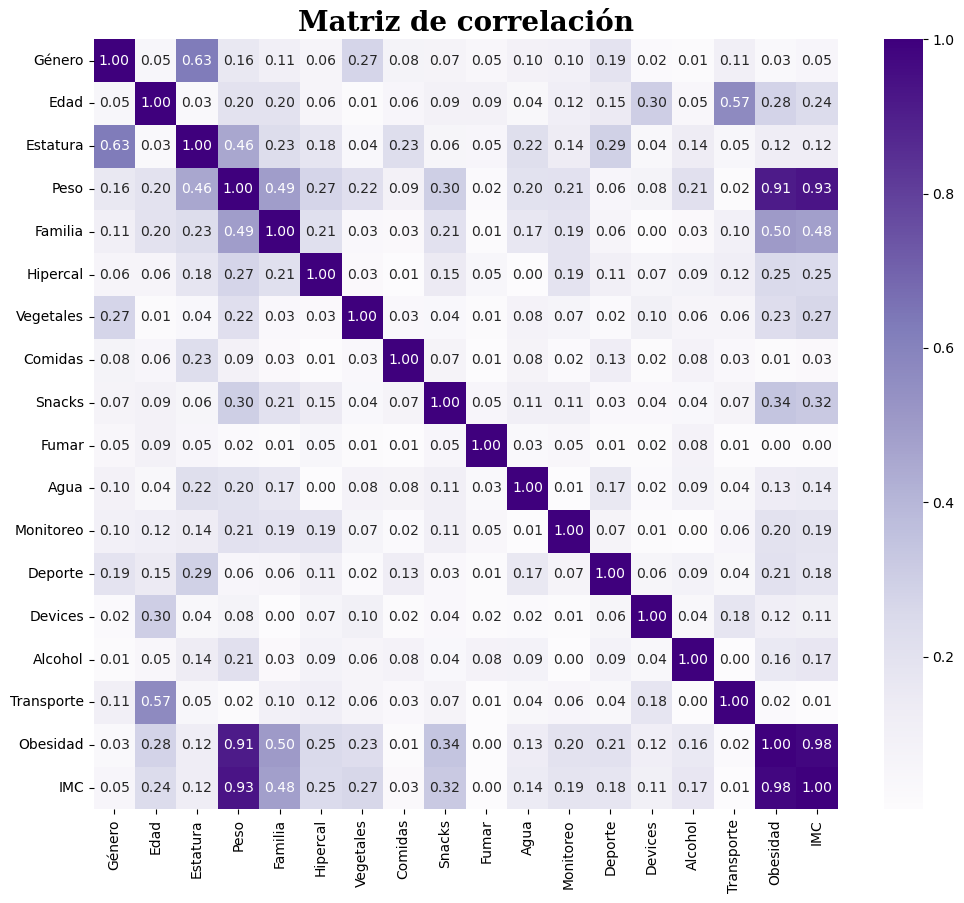

In [144]:
# Matrix de correlación (absoluta) para identificar variables con mayor correlación

plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True, cmap='Purples', fmt='.2f')
plt.title('Matriz de correlación', fontsize = 20, fontweight='bold', fontfamily='serif')

plt.show()

In [145]:
# Asignacion de variables

x = df2[['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal']] # Variables independientes

y = df2['Nivel'] # Clase

In [146]:
# Dividir los datos en datos de entrenamiento y datos de prueba

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [147]:
# Definir y aplicar el modelo de regresión logística

LR2 = LogisticRegression()
LR2.fit(X_train, y_train)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
# Realizar la predicción

y_pred = LR2.predict(X_test)

In [149]:
# Métricas de evaluación

metricasLR2 = classification_report(y_test, y_pred, target_names=['Peso normal', 'Sobrepeso', 'Obesidad'], digits=3)
print(f'Regresión logística - Reclasificación\n______________________________________________________\n\n{metricasLR2}')

Regresión logística - Reclasificación
______________________________________________________

              precision    recall  f1-score   support

 Peso normal      0.891     0.838     0.864       185
   Sobrepeso      0.614     0.768     0.682       151
    Obesidad      0.928     0.842     0.883       291

    accuracy                          0.823       627
   macro avg      0.811     0.816     0.810       627
weighted avg      0.841     0.823     0.829       627



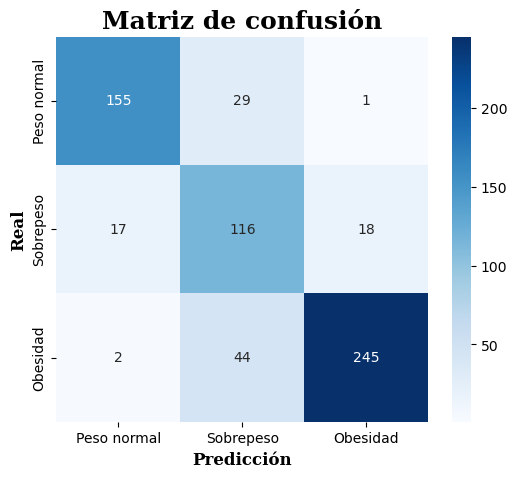

In [150]:
# Matriz de confusión

matrizLR2 = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con seaborn

plt.figure(figsize=(6, 5))
sns.heatmap(matrizLR2, annot=True, fmt='d', cmap='Blues', xticklabels=['Peso normal', 'Sobrepeso', 'Obesidad'],
            yticklabels=['Peso normal', 'Sobrepeso', 'Obesidad'])

plt.title('Matriz de confusión', fontsize = 18, fontweight='bold', fontfamily='serif')
plt.xlabel('Predicción', fontsize = 12, fontweight='bold', fontfamily='serif')
plt.ylabel('Real', fontsize = 12, fontweight='bold', fontfamily='serif')

plt.show()

# **Árbol de decisión**

In [151]:
df.sample(3)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Obesidad,IMC
1788,1,24.053310,1.872561,121.471077,1,1,2.808027,2.683061,1,0,2.640483,0,1.280191,0.00000,1,2,5,34.641839
1317,1,24.184891,1.768834,97.449743,1,1,2.000000,3.000000,1,0,2.973729,0,2.491642,1.36595,0,2,4,31.146306
108,1,22.000000,1.750000,95.000000,1,0,2.000000,3.000000,1,0,3.000000,0,3.000000,2.00000,0,0,4,31.020408


In [152]:
# Asignacion de variables

x = df[['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal']] # Variables independientes

y = df['Obesidad'] # Clase

In [153]:
# Dividir los datos en datos de entrenamiento y datos de prueba

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [154]:
# Definir y aplicar el modelo de árboles de decision

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='gini', max_depth=10)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [155]:
# Realizar la predicción

y_pred = DT.predict(X_test)

In [156]:
# Métricas de evaluación

metricasDT = classification_report(y_test, y_pred, target_names=['Bajo peso', 'Peso normal', 'Sobrepeso 1', 'Sobrepeso 2', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3'], digits=3)
print(f'Árbol de decisión\n______________________________________________________\n\n{metricasDT}')

Árbol de decisión
______________________________________________________

              precision    recall  f1-score   support

   Bajo peso      0.933     0.824     0.875        85
 Peso normal      0.640     0.740     0.687        77
 Sobrepeso 1      0.812     0.707     0.756        92
 Sobrepeso 2      0.699     0.674     0.686        86
  Obesidad 1      0.754     0.856     0.802       104
  Obesidad 2      0.918     0.876     0.897        89
  Obesidad 3      0.948     0.979     0.963        94

    accuracy                          0.812       627
   macro avg      0.815     0.808     0.809       627
weighted avg      0.818     0.812     0.813       627



In [157]:
# Visualización del árbol de decisión

from sklearn.tree import export_text

#tree_text = export_text(DT, feature_names=['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal'])
#print(tree_text)

In [158]:
# Visualización gráfica del árbol de decisión

from sklearn import tree

#plt.figure(figsize=(10, 10)) # Se puede modificar el tamaño para obtener mejor resolución
#tree.plot_tree(DT, feature_names=['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal'], filled=True) # Filled: Color
#plt.show()

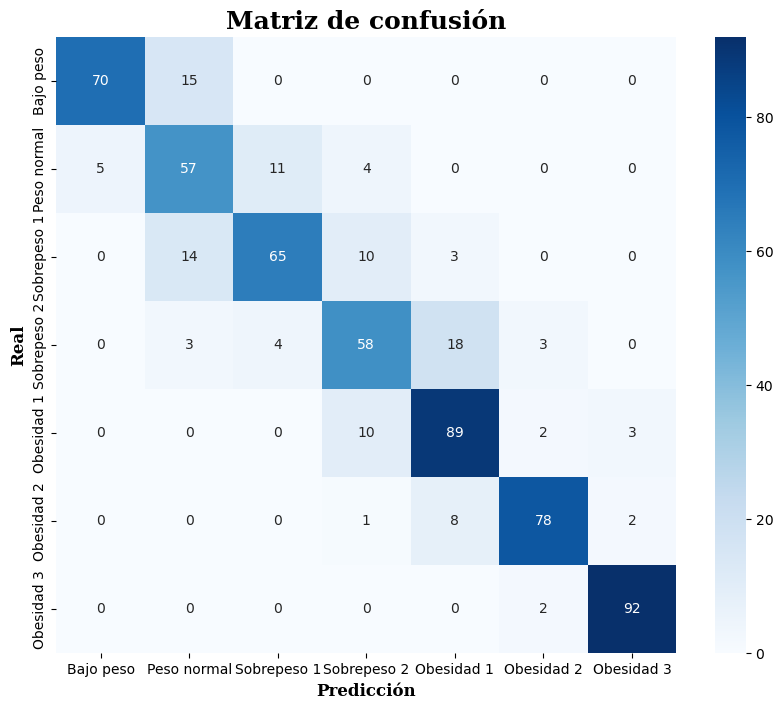

In [159]:
# Matriz de confusión

matrizDT = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con seaborn

plt.figure(figsize=(10, 8))
sns.heatmap(matrizDT, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo peso', 'Peso normal', 'Sobrepeso 1', 'Sobrepeso 2', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3'],
            yticklabels=['Bajo peso', 'Peso normal', 'Sobrepeso 1', 'Sobrepeso 2', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3'])

plt.title('Matriz de confusión', fontsize = 18, fontweight='bold', fontfamily='serif')
plt.xlabel('Predicción', fontsize = 12, fontweight='bold', fontfamily='serif')
plt.ylabel('Real', fontsize = 12, fontweight='bold', fontfamily='serif')

plt.show()

# **Árbol de desición - Reclasificación**

In [160]:
df2.sample(3)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Nivel
185,0,31.000000,1.620000,68.000000,0,0,3.0,3.000000,1,0,2.000000,0,1.0,0.000000,1,4,1
1030,1,34.288249,1.835678,96.018510,1,1,2.0,1.546665,1,0,3.000000,0,1.0,0.000000,1,4,1
1470,1,18.000000,1.799779,108.934574,1,1,2.0,1.194815,1,0,2.434832,0,1.0,1.541455,0,2,2


In [161]:
# Asignacion de variables

x = df2[['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal']] # Variables independientes

y = df2['Nivel'] # Clase

In [162]:
# Dividir los datos en datos de entrenamiento y datos de prueba

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [163]:
# Definir y aplicar el modelo de árboles de decision

DT2 = DecisionTreeClassifier(criterion='gini', max_depth=10)
DT2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [164]:
# Realizar la predicción

y_pred = DT2.predict(X_test)

In [165]:
# Métricas de evaluación

metricasDT2 = classification_report(y_test, y_pred, target_names=['Peso normal', 'Sobrepeso', 'Obesidad'], digits=3)
print(f'Árbol de decisión - Reclasificación\n______________________________________________________\n\n{metricasDT2}')

Árbol de decisión - Reclasificación
______________________________________________________

              precision    recall  f1-score   support

 Peso normal      0.882     0.887     0.884       168
   Sobrepeso      0.766     0.822     0.793       163
    Obesidad      0.958     0.916     0.936       296

    accuracy                          0.884       627
   macro avg      0.868     0.875     0.871       627
weighted avg      0.887     0.884     0.885       627



In [166]:
# Visualización del árbol de decisión

from sklearn.tree import export_text

#tree_text = export_text(DT2, feature_names=['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal'])
#print(tree_text)

In [167]:
# Visualización gráfica del árbol de decisión

from sklearn import tree

#plt.figure(figsize=(10, 10)) # Se puede modificar el tamaño para obtener mejor resolución
#tree.plot_tree(DT2, feature_names=['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal'], filled=True) # Filled: Color
#plt.show()

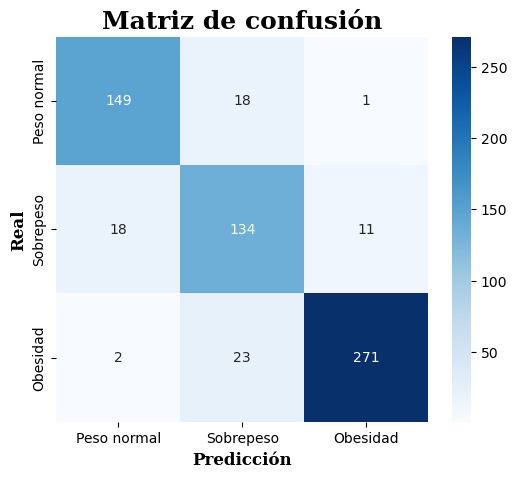

In [168]:
# Matriz de confusión

matrizDT2 = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con seaborn

plt.figure(figsize=(6, 5))
sns.heatmap(matrizDT2, annot=True, fmt='d', cmap='Blues', xticklabels=['Peso normal', 'Sobrepeso', 'Obesidad'],
            yticklabels=['Peso normal', 'Sobrepeso', 'Obesidad'])

plt.title('Matriz de confusión', fontsize = 18, fontweight='bold', fontfamily='serif')
plt.xlabel('Predicción', fontsize = 12, fontweight='bold', fontfamily='serif')
plt.ylabel('Real', fontsize = 12, fontweight='bold', fontfamily='serif')

plt.show()

# **Random Forest**

In [169]:
df.sample(3)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Obesidad,IMC
810,0,21.071195,1.616467,68.771850,1,1,1.452524,3.950553,0,0,2.109858,0,0.508847,1.194633,1,2,2,26.319463
1366,0,18.000000,1.649439,84.897738,1,1,2.000000,3.000000,1,0,1.039313,0,1.000000,0.000000,0,2,4,31.204958
1098,1,33.182127,1.838441,97.029249,1,1,2.000000,1.977221,1,0,3.000000,0,1.000000,0.000000,1,4,3,28.708022


In [170]:
# Asignacion de variables

x = df[['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal']] # Variables independientes

y = df['Obesidad'] # Clase

In [171]:
# Dividir los datos en datos de entrenamiento y datos de prueba

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [172]:
# Definir y aplicar el modelo de bosques aleatorios

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100, # Número de árboles
                                criterion = 'gini', # Criterio de incertidumbre - impureza
                                max_features = 'sqrt', # Selección aleatoria de características (sqrt(16) para este caso (16 variables))
                                bootstrap = True, # Muestreo por reemplazo
                                max_samples = 7/10, # Muestra aleatoria para cada arbol
                                oob_score = True) # Muestra para validación del modelo (bosque)
RF.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.7, oob_score=True)

In [173]:
# Realizar la predicción

y_pred = RF.predict(X_test)

In [174]:
# Métricas de evaluación

metricasRF = classification_report(y_test, y_pred, target_names=['Bajo peso', 'Peso normal', 'Sobrepeso 1', 'Sobrepeso 2', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3'], digits=3)
print(f'Bosques aleatorios\n______________________________________________________\n\n{metricasRF}')

Bosques aleatorios
______________________________________________________

              precision    recall  f1-score   support

   Bajo peso      0.859     0.884     0.871        69
 Peso normal      0.740     0.687     0.713        83
 Sobrepeso 1      0.822     0.732     0.774        82
 Sobrepeso 2      0.724     0.772     0.747        92
  Obesidad 1      0.795     0.840     0.817       106
  Obesidad 2      0.926     0.907     0.917        97
  Obesidad 3      0.950     0.980     0.965        98

    accuracy                          0.833       627
   macro avg      0.831     0.829     0.829       627
weighted avg      0.833     0.833     0.832       627



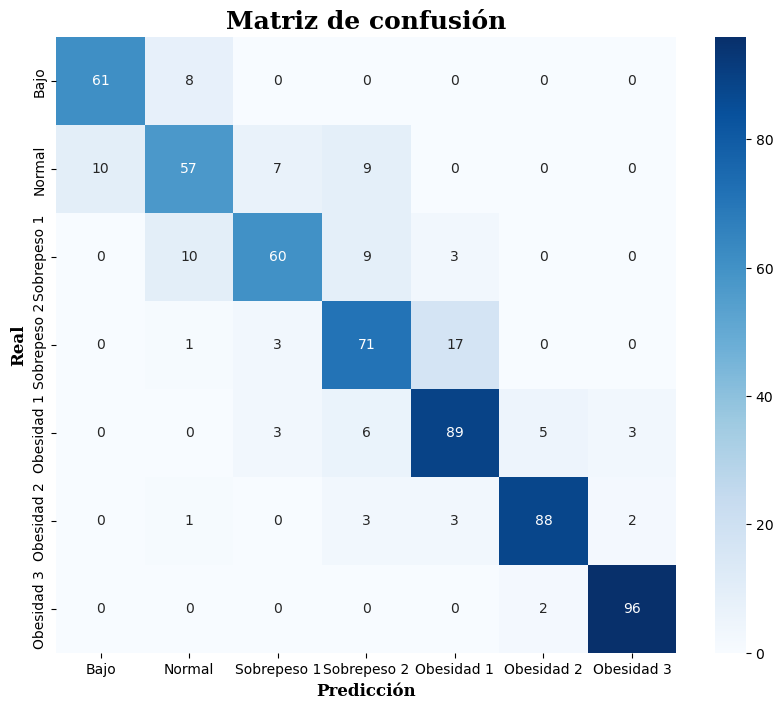

In [175]:
# Matriz de confusión

matrizRF = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con seaborn

plt.figure(figsize=(10, 8))
sns.heatmap(matrizRF, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Normal', 'Sobrepeso 1', 'Sobrepeso 2', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3'],
            yticklabels=['Bajo', 'Normal', 'Sobrepeso 1', 'Sobrepeso 2', 'Obesidad 1', 'Obesidad 2', 'Obesidad 3'])

plt.title('Matriz de confusión', fontsize = 18, fontweight='bold', fontfamily='serif')
plt.xlabel('Predicción', fontsize = 12, fontweight='bold', fontfamily='serif')
plt.ylabel('Real', fontsize = 12, fontweight='bold', fontfamily='serif')

plt.show()

# **Random Forest - Reclasificación**

In [176]:
df2.sample(3)

,Género,Edad,Estatura,Peso,Familia,Hipercal,Vegetales,Comidas,Snacks,Fumar,Agua,Monitoreo,Deporte,Devices,Alcohol,Transporte,Nivel
1743,1,25.492855,1.770124,114.163921,1,1,2.159033,3.0,1,0,2.116399,0,1.331526,0.052942,1,2,2
1640,1,25.846279,1.772731,115.828167,1,1,2.381164,3.0,1,0,2.170225,0,1.211048,1.899330,1,2,2
2007,0,25.999174,1.638218,104.810024,1,1,3.000000,3.0,1,0,2.654636,0,0.069238,0.629578,1,2,2


In [177]:
# Asignacion de variables

x = df2[['Peso', 'Familia', 'Snacks', 'Edad', 'Hipercal']] # Variables independientes

y = df2['Nivel'] # Clase

In [178]:
# Dividir los datos en datos de entrenamiento y datos de prueba

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [179]:
# Definir y aplicar el modelo de bosques aleatorios

from sklearn.ensemble import RandomForestClassifier

RF2 = RandomForestClassifier(n_estimators = 100, # Número de árboles
                                criterion = 'gini', # Criterio de incertidumbre - impureza
                                max_features = 'sqrt', # Selección aleatoria de características (sqrt(16) para este caso (16 variables))
                                bootstrap = True, # Muestreo por reemplazo
                                max_samples = 7/10, # Muestra aleatoria para cada arbol
                                oob_score = True) # Muestra para validación del modelo (bosque)
RF2.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.7, oob_score=True)

In [180]:
# Realizar la predicción

y_pred = RF2.predict(X_test)

In [181]:
# Métricas de evaluación

metricasRF2 = classification_report(y_test, y_pred, target_names=['Peso normal', 'Sobrepeso', 'Obesidad'], digits=3)
print(f'Bosques aleatorios\n______________________________________________________\n\n{metricasRF2}')

Bosques aleatorios
______________________________________________________

              precision    recall  f1-score   support

 Peso normal      0.952     0.899     0.925       178
   Sobrepeso      0.824     0.794     0.809       165
    Obesidad      0.910     0.961     0.935       284

    accuracy                          0.900       627
   macro avg      0.895     0.885     0.889       627
weighted avg      0.899     0.900     0.899       627



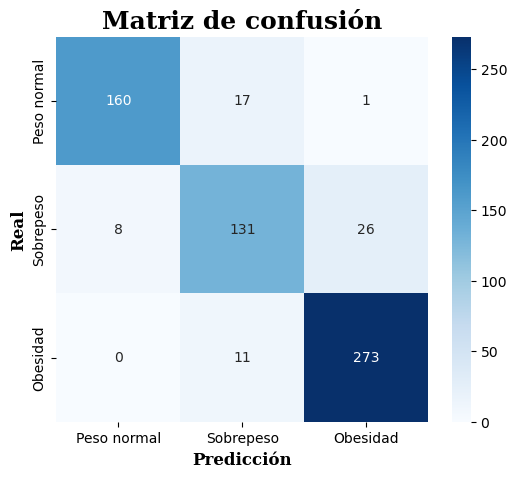

In [182]:
# Matriz de confusión

matrizRF2 = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con seaborn

plt.figure(figsize=(6, 5))
sns.heatmap(matrizRF2, annot=True, fmt='d', cmap='Blues', xticklabels=['Peso normal', 'Sobrepeso', 'Obesidad'],
            yticklabels=['Peso normal', 'Sobrepeso', 'Obesidad'])

plt.title('Matriz de confusión', fontsize = 18, fontweight='bold', fontfamily='serif')
plt.xlabel('Predicción', fontsize = 12, fontweight='bold', fontfamily='serif')
plt.ylabel('Real', fontsize = 12, fontweight='bold', fontfamily='serif')

plt.show()

# **Correlación con la transformación productiva mediante ciencia y tecnología**

---



#**Rev Asoc Esp Med Trab • Diciembre 2024 • Vol 33 • Núm. 4 • 365 - 526**

**___-8531 empleados-___**

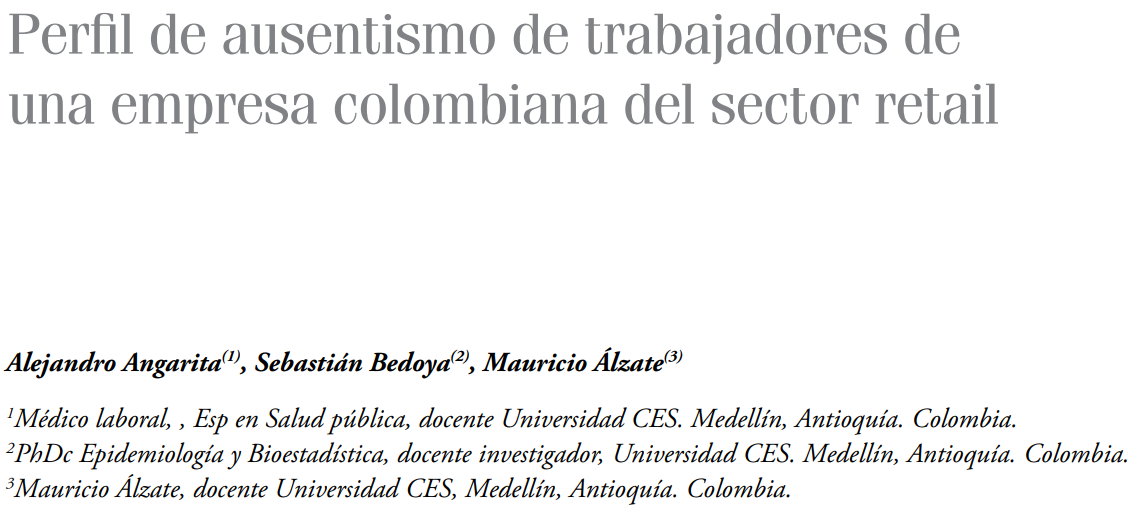

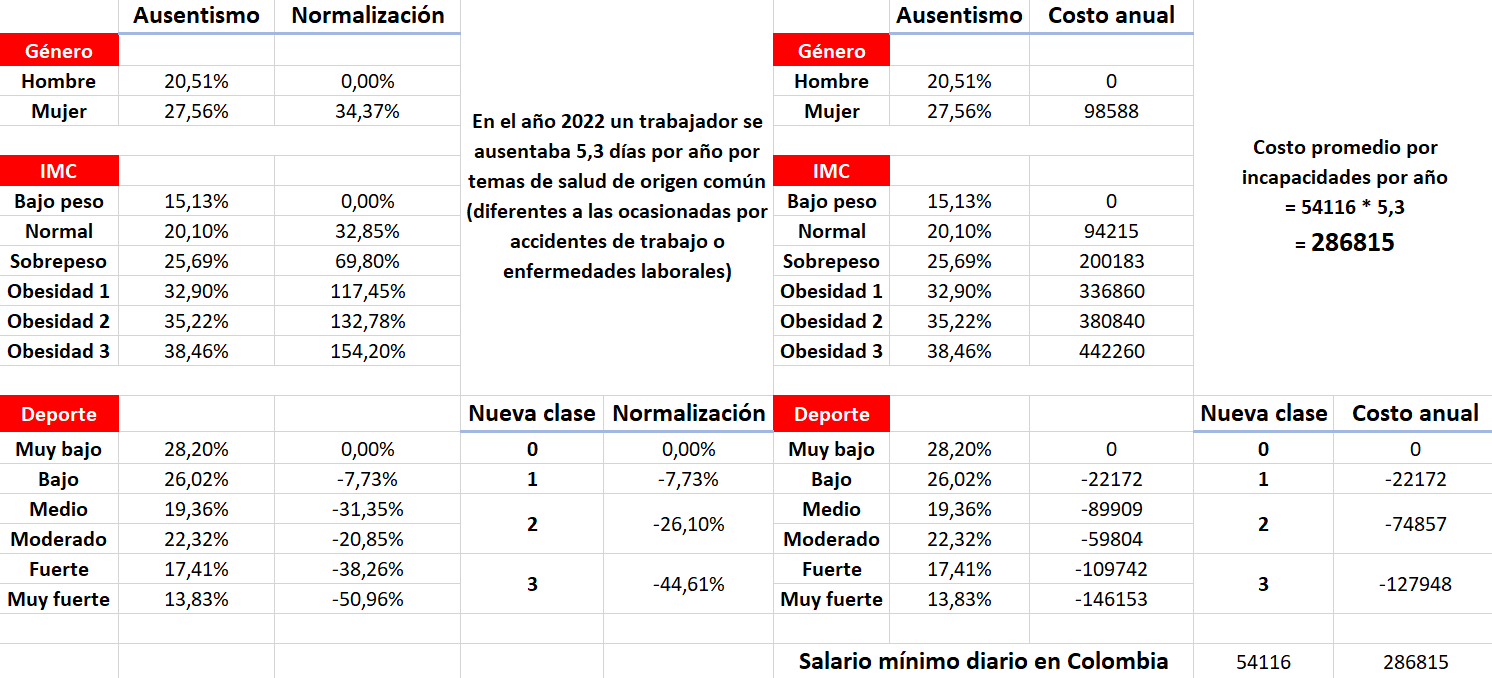

# **Otros modelos**

**k-NN**

In [183]:
# Definir y aplicar el modelo de k-nn
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform')
KNN.fit(X_train, y_train)

# Realizar la predicción
y_pred = RF2.predict(X_test)

# Métricas de evaluación
metricasKNN = classification_report(y_test, y_pred, target_names=['Peso normal', 'Sobrepeso', 'Obesidad'], digits=3)
print(f'k vecinos más próximos\n______________________________________________________\n\n{metricasKNN}')

k vecinos más próximos
______________________________________________________

              precision    recall  f1-score   support

 Peso normal      0.952     0.899     0.925       178
   Sobrepeso      0.824     0.794     0.809       165
    Obesidad      0.910     0.961     0.935       284

    accuracy                          0.900       627
   macro avg      0.895     0.885     0.889       627
weighted avg      0.899     0.900     0.899       627



**XGBoost**

In [184]:
# Definir y aplicar el modelo de XGBoost
import xgboost as xgb

XGBoost = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
XGBoost.fit(X_train, y_train)

# Realizar la predicción
y_pred = XGBoost.predict(X_test)

# Métricas de evaluación
metricasXGBoost = classification_report(y_test, y_pred, target_names=['Peso normal', 'Sobrepeso', 'Obesidad'], digits=3)
print(f'eXtreme Gradient Boosting\n______________________________________________________\n\n{metricasXGBoost}')

eXtreme Gradient Boosting
______________________________________________________

              precision    recall  f1-score   support

 Peso normal      0.951     0.871     0.909       178
   Sobrepeso      0.818     0.818     0.818       165
    Obesidad      0.910     0.958     0.933       284

    accuracy                          0.896       627
   macro avg      0.893     0.882     0.887       627
weighted avg      0.897     0.896     0.896       627



**SVM**

In [185]:
# Definir y aplicar el modelo de XGBoost
from sklearn.svm import SVC

SVCc = SVC(kernel='linear', C=1.0)
SVCc.fit(X_train, y_train)

# Realizar la predicción
y_pred = SVCc.predict(X_test)

# Métricas de evaluación
metricasSVCc = classification_report(y_test, y_pred, target_names=['Peso normal', 'Sobrepeso', 'Obesidad'], digits=3)
print(f'Máquina de vectores de soporte\n______________________________________________________\n\n{metricasSVCc}')

Máquina de vectores de soporte
______________________________________________________

              precision    recall  f1-score   support

 Peso normal      0.910     0.854     0.881       178
   Sobrepeso      0.663     0.739     0.699       165
    Obesidad      0.899     0.873     0.886       284

    accuracy                          0.833       627
   macro avg      0.824     0.822     0.822       627
weighted avg      0.840     0.833     0.835       627



# **Resumen - Todos los modelos**

In [186]:
print(f'Regresión logística\n______________________________________________________\n\n{metricasLR}\n\n')
print(f'Regresión logística - Reclasificación\n______________________________________________________\n\n{metricasLR2}\n\n')
print(f'Árbol de decisión\n______________________________________________________\n\n{metricasDT}\n\n')
print(f'Árbol de decisión - Reclasificación\n______________________________________________________\n\n{metricasDT2}\n\n')
print(f'Bosques aleatorios\n______________________________________________________\n\n{metricasRF}\n\n')
print(f'Bosques aleatorios - Reclasificación\n______________________________________________________\n\n{metricasRF2}\n\n')
print(f'k vecinos más próximos - Reclasificación\n______________________________________________________\n\n{metricasKNN}\n\n')
print(f'eXtreme Gradient Boosting - Reclasificación\n______________________________________________________\n\n{metricasXGBoost}\n\n')
print(f'Máquina de vectores de soporte - Reclasificación\n______________________________________________________\n\n{metricasSVCc}\n\n')

Regresión logística
______________________________________________________

              precision    recall  f1-score   support

   Bajo peso      0.662     0.586     0.622        87
 Peso normal      0.531     0.358     0.428        95
 Sobrepeso 1      0.373     0.388     0.380        80
 Sobrepeso 2      0.460     0.311     0.371        74
  Obesidad 1      0.328     0.390     0.357       105
  Obesidad 2      0.463     0.589     0.519        95
  Obesidad 3      0.346     0.407     0.374        91

    accuracy                          0.435       627
   macro avg      0.452     0.433     0.436       627
weighted avg      0.450     0.435     0.436       627



Regresión logística - Reclasificación
______________________________________________________

              precision    recall  f1-score   support

 Peso normal      0.891     0.838     0.864       185
   Sobrepeso      0.614     0.768     0.682       151
    Obesidad      0.928     0.842     0.883       291

    accuracy 